#**Grouping in the FIFA 2019 player database**


This database contains 89 attributes of 18.2K soccer players from the 2019 FIFA edition game.

Link to a database on Kaggle: https://www.kaggle.com/karangadiya/fifa19

We will use the technical characteristics of each player, along with the height and weight to group them into a technical profile. We will investigate the relationships between these profiles and the players' original positions.

![alt text](https://drive.google.com/uc?id=1gU3b_FK3uYremYa_k6crSiGfTrEiKdaQ)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.shape

(18207, 89)

In [ ]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
'''
Showing the name of the features (columns)
'''
for i, column in enumerate(df.columns):
  print(i, column)

0 Unnamed: 0
1 ID
2 Name
3 Age
4 Photo
5 Nationality
6 Flag
7 Overall
8 Potential
9 Club
10 Club Logo
11 Value
12 Wage
13 Special
14 Preferred Foot
15 International Reputation
16 Weak Foot
17 Skill Moves
18 Work Rate
19 Body Type
20 Real Face
21 Position
22 Jersey Number
23 Joined
24 Loaned From
25 Contract Valid Until
26 Height
27 Weight
28 LS
29 ST
30 RS
31 LW
32 LF
33 CF
34 RF
35 RW
36 LAM
37 CAM
38 RAM
39 LM
40 LCM
41 CM
42 RCM
43 RM
44 LWB
45 LDM
46 CDM
47 RDM
48 RWB
49 LB
50 LCB
51 CB
52 RCB
53 RB
54 Crossing
55 Finishing
56 HeadingAccuracy
57 ShortPassing
58 Volleys
59 Dribbling
60 Curve
61 FKAccuracy
62 LongPassing
63 BallControl
64 Acceleration
65 SprintSpeed
66 Agility
67 Reactions
68 Balance
69 ShotPower
70 Jumping
71 Stamina
72 Strength
73 LongShots
74 Aggression
75 Interceptions
76 Positioning
77 Vision
78 Penalties
79 Composure
80 Marking
81 StandingTackle
82 SlidingTackle
83 GKDiving
84 GKHandling
85 GKKicking
86 GKPositioning
87 GKReflexes
88 Release Clause


In [ ]:
'''
We want to take some phisical characteristics (Position, Height and Weight), in positions 21, 26 and 27 of dataframe
and we want to concatenate them with the technical characteristics.
'''
columns = [21, 26, 27]

#All thecnical characteristics from column 54 to the column 83
columns += range(54, 83)

In [ ]:
print(columns)

[21, 26, 27, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


In [ ]:
df = df.iloc[:, columns]

In [ ]:
df.head()

,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


**Checking the missing values**

In [ ]:
df.isna().sum(axis = 0)

Position           60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

The maximum number of missing values in a single feature is 60. We have 18207 registers. Wich means that only 60/18207 = 0.00329.... wich represents 0.32% of the entire dataset. So we are just gonna delete the rows with missing values

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum(axis = 0)

Position           0
Height             0
Weight             0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

**Inspecting Statistics**

In [ ]:
def hist_boxplot(feature):
  fig, ax = plt.subplots(1, 2)
  ax[0].hist(feature)
  ax[1].boxplot(feature)

In [ ]:
df_describe = df.describe()
df_describe

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336
std,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [ ]:
'''
Searching for the min value of each feature
'''
df_describe.loc['min']

Crossing            5.0
Finishing           2.0
HeadingAccuracy     4.0
ShortPassing        7.0
Volleys             4.0
Dribbling           4.0
Curve               6.0
FKAccuracy          3.0
LongPassing         9.0
BallControl         5.0
Acceleration       12.0
SprintSpeed        12.0
Agility            14.0
Reactions          21.0
Balance            16.0
ShotPower           2.0
Jumping            15.0
Stamina            12.0
Strength           17.0
LongShots           3.0
Aggression         11.0
Interceptions       3.0
Positioning         2.0
Vision             10.0
Penalties           5.0
Composure           3.0
Marking             3.0
StandingTackle      2.0
SlidingTackle       3.0
Name: min, dtype: float64

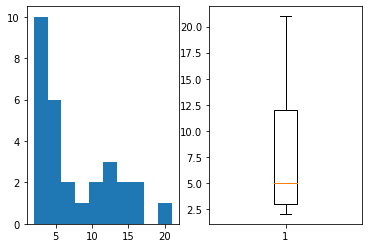

In [ ]:
'''
Many min values are around the value 5
'''
hist_boxplot(df_describe.loc['min'])

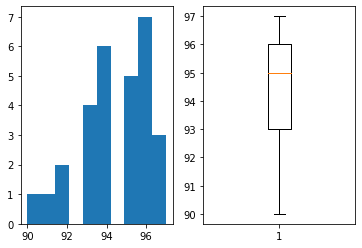

In [ ]:
'''
Most of the max values are around the value 95
'''
hist_boxplot(df_describe.loc['max'])

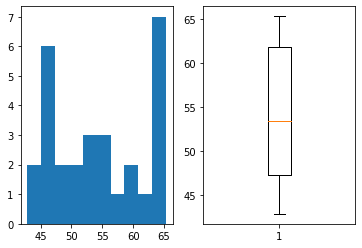

In [ ]:
'''
Most of the mean values is around the value 53/54
'''
hist_boxplot(df_describe.loc['mean'])


As you can see from the mean graph above, the values ​​are dispersed enough so that we can be able to perform the cluster analysis

**Treating the Player's height**

In [ ]:
df.dtypes

Position            object
Height              object
Weight              object
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
dtype: object

In [ ]:
'''
Here i am looking for all the features who has non numerical types
'''
df.dtypes[(x not in ['int64', 'float64'] for x in df.dtypes)]

Position    object
Height      object
Weight      object
dtype: object

In [ ]:
'''
It looks like we have the imperial measure system being used that only the US uses.
'''
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

We, the rest of the world, use the metric system, the right measure system. So we will need to convert those values.

In [ ]:
df['Height'] = df['Height'].str.split('\'')
df['Height']

0         [5, 7]
1         [6, 2]
2         [5, 9]
3         [6, 4]
4        [5, 11]
          ...   
18202     [5, 9]
18203     [6, 3]
18204     [5, 8]
18205    [5, 10]
18206    [5, 10]
Name: Height, Length: 18147, dtype: object

In [ ]:
'''
Conversion to metric system
'''
df['Height'] = [30.48 * int(elem[0]) + 2.54 * int(elem[1]) for elem in df['Height']]
df['Height']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18147, dtype: float64

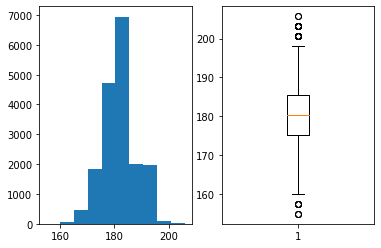

In [ ]:
'''
We have a normal distribution of the height with the mean equals to 1,80cm
'''
hist_boxplot(df['Height'])

**Treating the weight**

In [ ]:
'''
Again, we have something different than the metric system. We need to fix that
'''
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [ ]:
'''
We want only the numerical values. The 'lbs' after the number is unnimportant. 
'''
df['Weight'] = df['Weight'].str.split('l')
df['Weight']

0        [159, bs]
1        [183, bs]
2        [150, bs]
3        [168, bs]
4        [154, bs]
           ...    
18202    [134, bs]
18203    [170, bs]
18204    [148, bs]
18205    [154, bs]
18206    [176, bs]
Name: Weight, Length: 18147, dtype: object

In [ ]:
'''
The weight is also converted to a more proper measure system
'''
df['Weight'] = [int(elem[0]) * 0.453 for elem in df['Weight']]
df['Weight']

0        72.027
1        82.899
2        67.950
3        76.104
4        69.762
          ...  
18202    60.702
18203    77.010
18204    67.044
18205    69.762
18206    79.728
Name: Weight, Length: 18147, dtype: float64

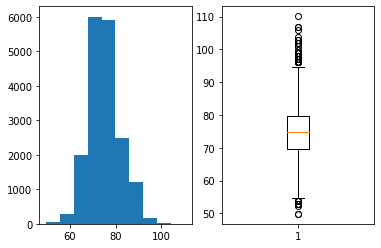

In [ ]:
'''
We also have a normal distribution in the weight feature. With some outliers
'''
hist_boxplot(df['Weight'])

#**Preparing the database for grouping**

In [ ]:
'''
We have only char values in the position. For grouping, we need the numerical values. We will make the association with 
the grouped values with the numerical values in the position. So, we are just gonna delete this column ( position)
'''
position = np.array(df['Position'])
print(position)

['RF' 'ST' 'LW' ... 'ST' 'RW' 'CM']


In [ ]:
np.unique(position, return_counts=True)

(array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
        'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
        'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object),
 array([ 958, 1778,  948,   74, 1394, 2025,   21, 1322,  648,  395,  243,
          15, 1095,  207,  381,   78,   21, 1291,  662,  391,  248,   16,
        1124,  203,  370,   87, 2152]))

In [ ]:
df = df.drop(['Position'], axis = 1)

**Now we need normalize the numerical values between 0 and 1**

In [ ]:
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df)

In [ ]:
'''
After the normalization, we have a problema with the new dataframe type. 
'''
type(df_train)

numpy.ndarray

#**Grouping with K-means**

###**We need to choose a proper number of clusters.**

**Choosing the proper number of clusters using WCSS with the elbow method**

In [ ]:
wcss = []

#We will choose between 1 and 11 clusters. That is because we have a maximum of 11 players of each team in total.
K = range(1, 12)

for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(df_train)
  wcss.append(km.inertia_)

In [ ]:
wcss

[19914.28718803698,
 12555.880271124657,
 9381.810611713818,
 7595.507132356762,
 6934.251508436292,
 6442.550884409456,
 6113.864471969518,
 5840.736333875007,
 5623.334872279328,
 5449.1265464890985,
 5327.715324003002]

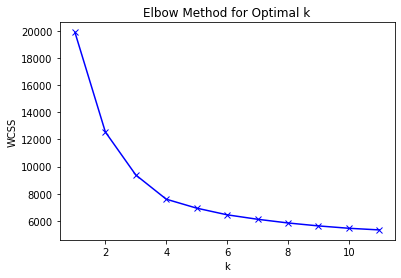

In [ ]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k');

The graphic above shows the elbow method in action. "We are looking for the the value of k at the 'elbow' - ie the point after which the distortion/inertia start decreasing in a linear fashion". **Thus for the given data, we conclude that the optimal number of clusters for the data is 4**.


---
The explanation for this method can be seen in the following link: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/



#**Dimensionality reduction using PCA (Principal Component Analysis)**

We have over 30 characteristics for each player. This way, it's not gonna be possible to plot a graphic in the cartesian plan. 
So instead of representing players from 30 characteristics, we will represent them from two.

In [ ]:
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_train)

In [ ]:
df_train.shape

(18147, 31)

In [ ]:
df_pca.shape

(18147, 2)

In [ ]:
df_pca

array([[-1.56786188, -1.06749087],
       [-1.48558143, -0.80876489],
       [-1.43389271, -0.95713023],
       ...,
       [ 0.70171909, -0.64105504],
       [ 0.61368167, -0.55466255],
       [ 0.52857009,  0.10029135]])

In [ ]:
'''
These are the variance of the data for each of the 2 features
'''
pca.explained_variance_ratio_

array([0.52943566, 0.20404527])

In [ ]:
'''
This is done only for convert the variance values to percentage, so that we can plot in a graphic later.
'''
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]

In [ ]:
exp_var

[52.9, 20.4]

###**Choosing the proper number of clusters with silhouette method**




*   Takes into account cohesion and separation;
*   **Cohesion**: measure of distance from one point to all other points in the same group;
*   **Separation**: measure the distance of a point with the points of the other clusters;
*   The coefficient is in the range of [-1, 1];
*   The value -1 indicates that the cluster is bad (register as "wrong" groups);
*   The value 0 indicates "indifference" (above the decision line, one cluster next to the other);
*   The value 1 indicates that the clusters are far apart









The method below is explained in the following link: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters =  2  Average score:  0.4703559214248003
For n_clusters =  3  Average score:  0.2853119307185486
For n_clusters =  4  Average score:  0.27054139480884387
For n_clusters =  5  Average score:  0.24277984096086125
For n_clusters =  6  Average score:  0.2173940307436049
For n_clusters =  7  Average score:  0.20890123641990385
For n_clusters =  8  Average score:  0.20272419316326296
For n_clusters =  9  Average score:  0.1891313715604252
For n_clusters =  10  Average score:  0.18359029329361964
For n_clusters =  11  Average score:  0.17703691646748654


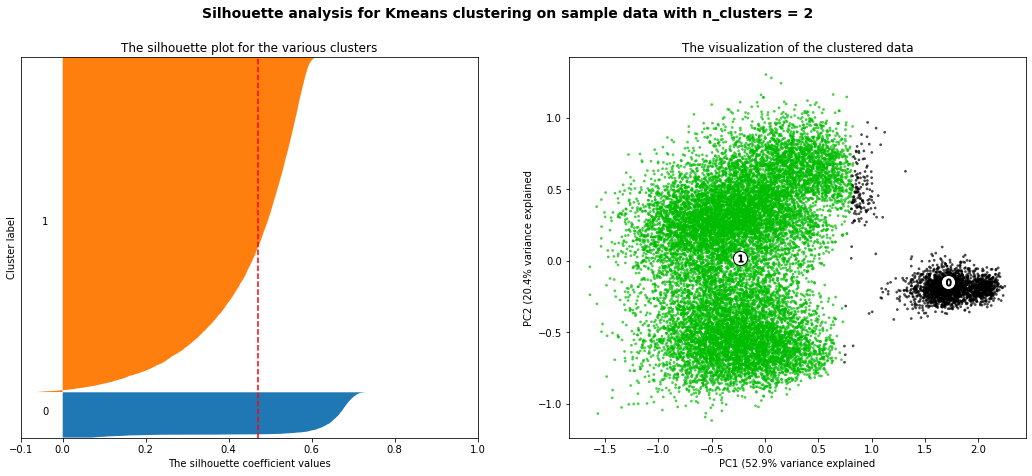

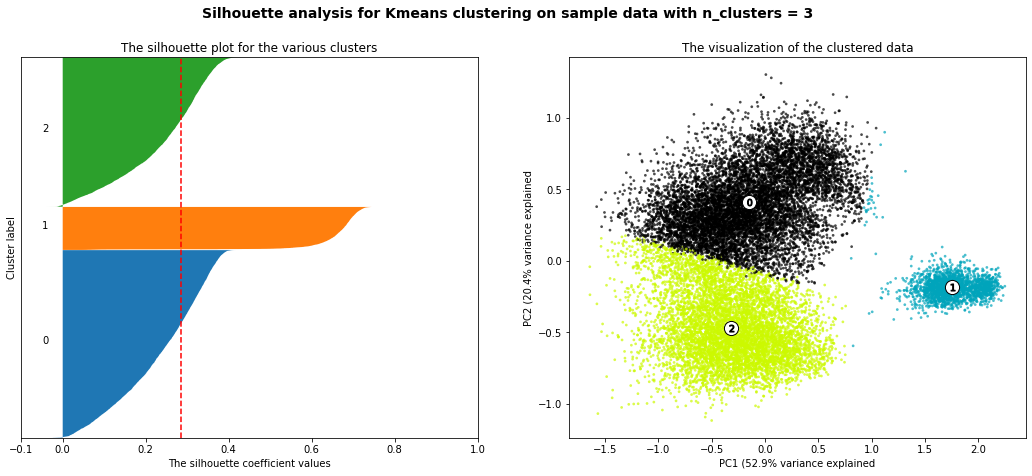

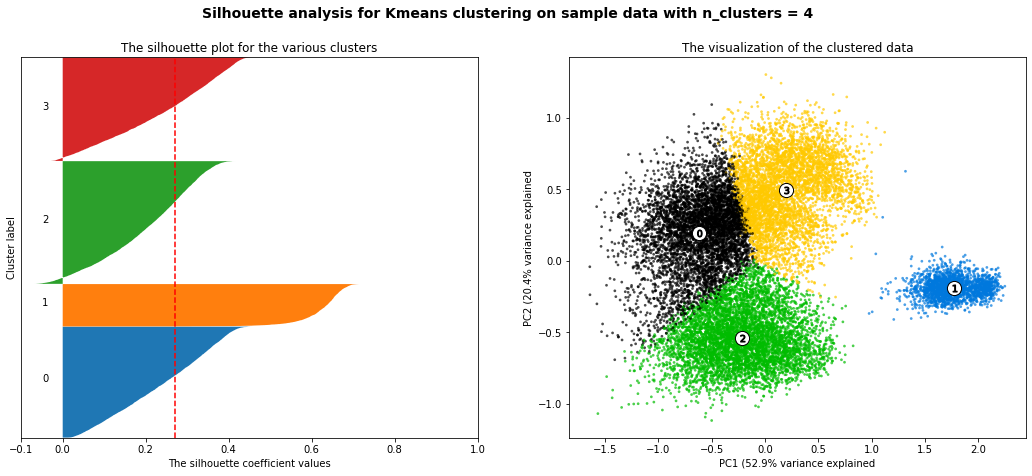

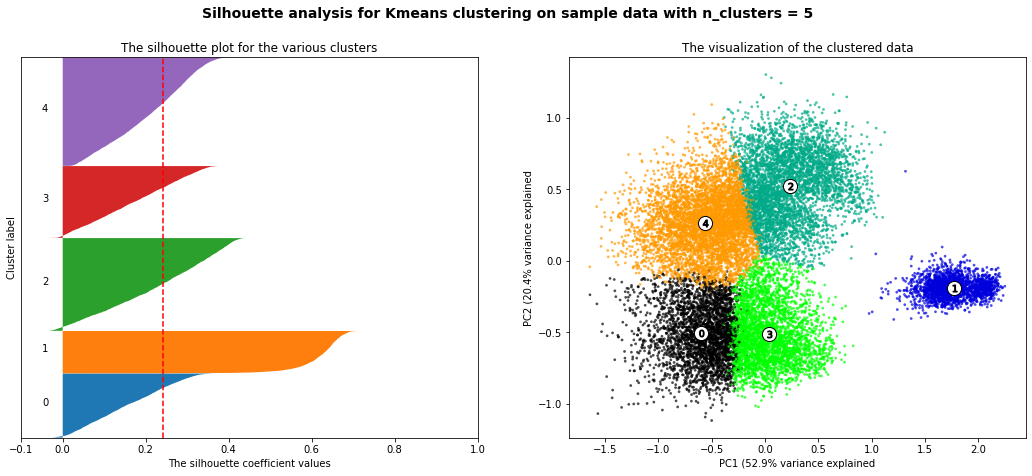

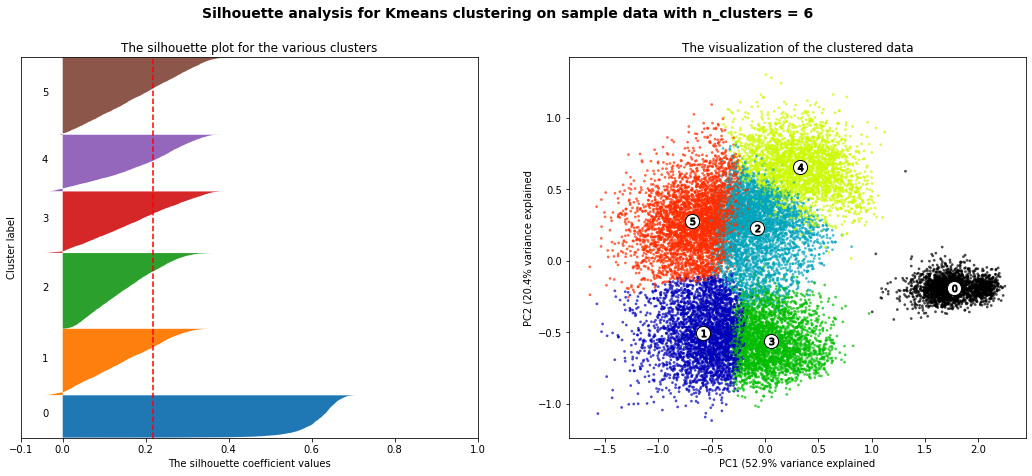

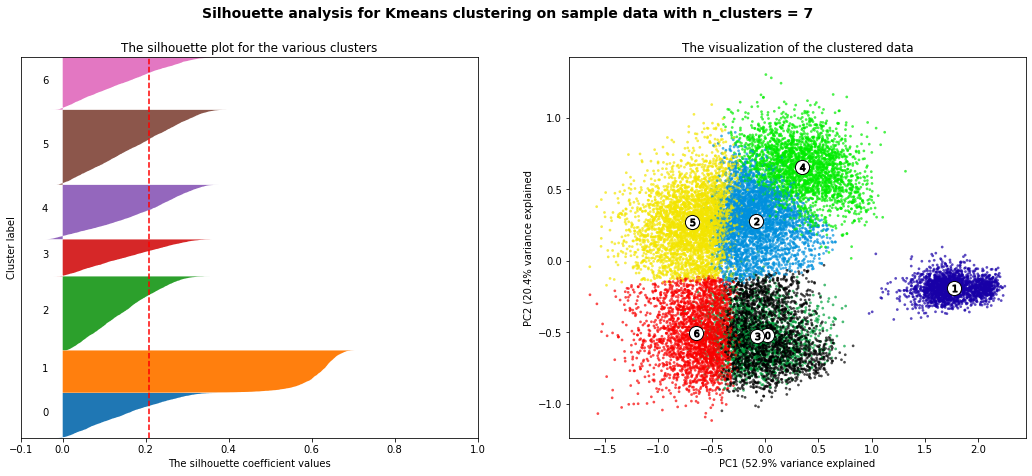

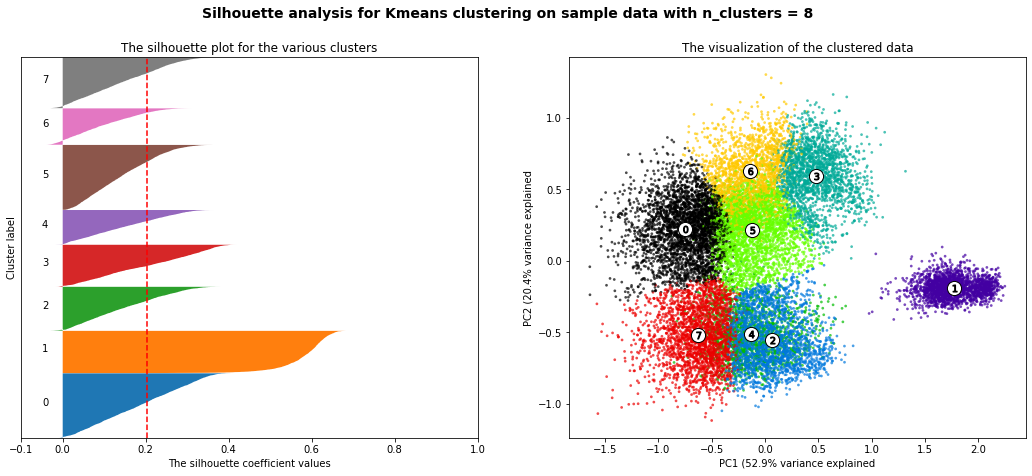

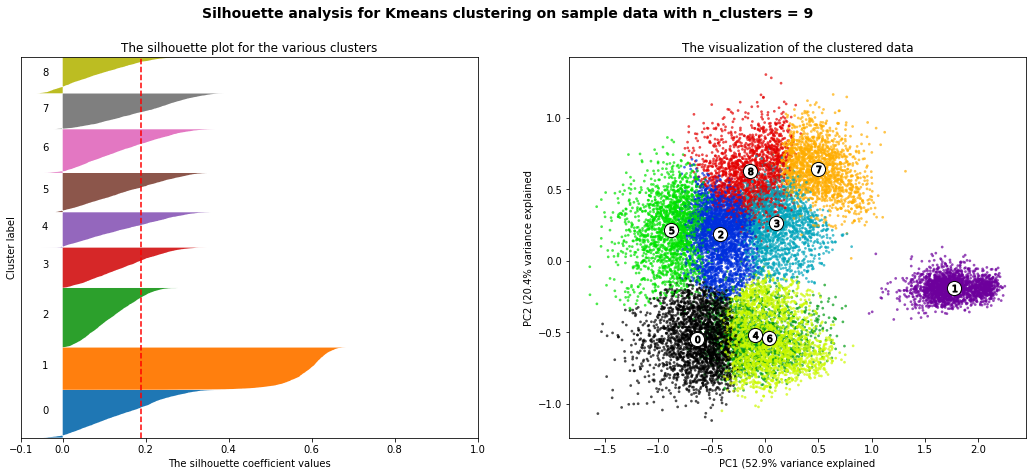

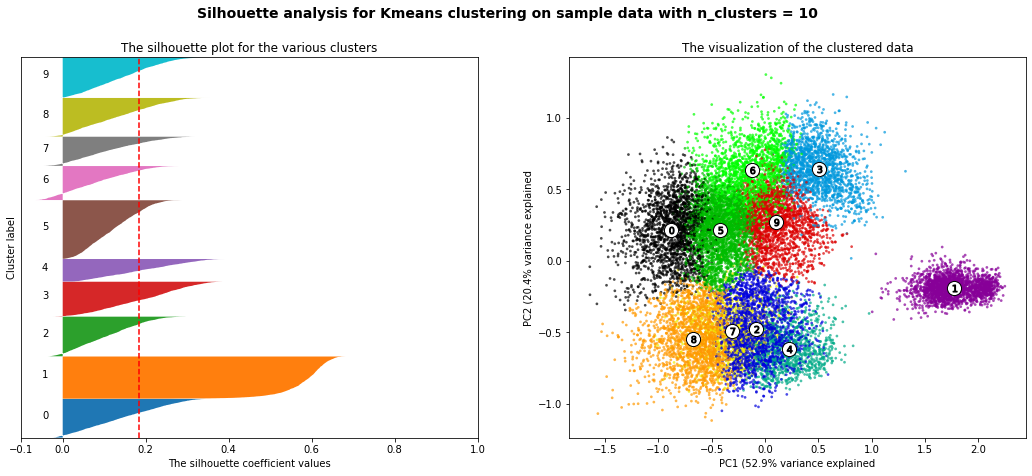

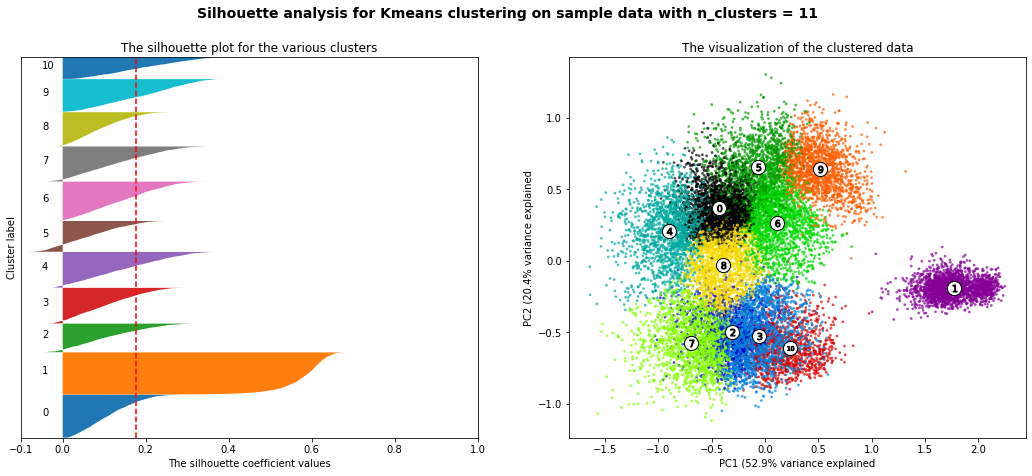

In [ ]:
range_n_clusters = range(2, 12)
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df_train) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(df_train)
  #print(cluster_labels)
  #print(np.unique(cluster_labels))

  silhouette_avg = silhouette_score(df_train, cluster_labels)
  print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

  sample_silhouette_values = silhouette_samples(df_train, cluster_labels)
  #print(sample_silhouette_values)
  #print(len(sample_silhouette_values))

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    #print(ith_cluster_silhouette_values.shape)

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    #print(y_upper)

    ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")   

  ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = clusterer.cluster_centers_
  centers = pca.transform(centers)
  ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '% variance explained')
  ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '% variance explained')

  plt.suptitle(("Silhouette analysis for Kmeans clustering on sample data with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

#**Applying the K-means**

After applying 2 methods to discover what's the best number of cluster, we are gonna aplly the the K-means

In [ ]:
km = KMeans(n_clusters = 4, n_init = 100, random_state = 0)
km.fit(df_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
print(km.cluster_centers_)

[[0.47013853 0.38293013 0.5576947  0.64974042 0.55672615 0.63006471
  0.59752368 0.66477984 0.55792792 0.50148757 0.50811364 0.66493571
  0.71487037 0.72121845 0.69870311 0.52860612 0.67339234 0.66919714
  0.6048123  0.61194385 0.55008338 0.6054462  0.44945108 0.29457726
  0.65413198 0.57697069 0.62462919 0.61157546 0.32979437 0.30457434
  0.27978412]
 [0.65466206 0.53151997 0.10523837 0.10798309 0.11573754 0.23573043
  0.09783045 0.10612113 0.09896511 0.12593179 0.20004933 0.16441772
  0.30959691 0.31790471 0.3193654  0.50540372 0.33857918 0.22087305
  0.53352861 0.21978293 0.54510977 0.10621988 0.18329927 0.1580905
  0.09979789 0.32106444 0.17276537 0.45280116 0.13459505 0.13372222
  0.12617729]
 [0.56041038 0.44628469 0.44585185 0.31361683 0.61720199 0.578172
  0.31988557 0.47179015 0.34797507 0.34161212 0.49725312 0.5396597
  0.57416782 0.59151412 0.52113478 0.50161336 0.54102293 0.4827029
  0.65366124 0.62808096 0.66392828 0.3432104  0.62415821 0.6502162
  0.39670303 0.39151603 0.

In [ ]:
'''
Here we are showing, for each one of the rows, to wich group that value belongs to. For instance, the last register
belongs to group 2
'''
print(km.labels_)

[0 0 0 ... 0 0 2]


In [ ]:
len(km.labels_)

18147

#**Correlation between the groups and the position**

In [ ]:
len(position)

18147

In [ ]:
groups = km.labels_
compar = []
for i in range(0, len(position)):
  elem = tuple((position[i], groups[i]))
  compar.append(elem)


In [ ]:
'''
This variable is saying that the first player is in the position 'RF' and it's in the group 0,
the second player is in the position  'ST' and it's in the group 0 and so on. 
'''
compar[0:4]

[('RF', 0), ('ST', 0), ('LW', 0), ('GK', 1)]

In [ ]:
count = Counter(compar)
count

Counter({('CAM', 0): 660,
         ('CAM', 2): 18,
         ('CAM', 3): 280,
         ('CB', 0): 1,
         ('CB', 1): 1,
         ('CB', 2): 1621,
         ('CB', 3): 155,
         ('CDM', 0): 4,
         ('CDM', 2): 384,
         ('CDM', 3): 560,
         ('CF', 0): 68,
         ('CF', 3): 6,
         ('CM', 0): 224,
         ('CM', 2): 325,
         ('CM', 3): 845,
         ('GK', 1): 2024,
         ('GK', 2): 1,
         ('LAM', 0): 18,
         ('LAM', 3): 3,
         ('LB', 0): 7,
         ('LB', 2): 596,
         ('LB', 3): 719,
         ('LCB', 0): 1,
         ('LCB', 2): 533,
         ('LCB', 3): 114,
         ('LCM', 0): 56,
         ('LCM', 2): 31,
         ('LCM', 3): 308,
         ('LDM', 0): 6,
         ('LDM', 2): 48,
         ('LDM', 3): 189,
         ('LF', 0): 11,
         ('LF', 3): 4,
         ('LM', 0): 805,
         ('LM', 2): 33,
         ('LM', 3): 257,
         ('LS', 0): 192,
         ('LS', 3): 15,
         ('LW', 0): 330,
         ('LW', 2): 2,
         ('L

**Creating a dataframe with the information about the position, the group that each belongs and the quantity of players in that position to that group**

In [ ]:
compar = pd.DataFrame({'Position': [i[0] for i in list(count.keys())],
                       'Group': [i[1] for i in list(count.keys())],
                       'Quantity': list(count.values())})

In [ ]:
compar.head()

,Position,Group,Quantity
0,RF,0,12
1,ST,0,2068
2,LW,0,330
3,GK,1,2024
4,RCM,3,323


In [ ]:
compar.shape

(77, 3)

In [ ]:
'''
Ordering the dataframe by position
'''
compar = compar.sort_values(['Position', 'Group'])
compar.head()

,Position,Group,Quantity
30,CAM,0,660
64,CAM,2,18
12,CAM,3,280
66,CB,0,1
74,CB,1,1


In [ ]:
'''
In the variable 'pos' we have all the unique values to the feature 'position'
'''
pos = compar['Position'].unique()
pos

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [ ]:
'''
Here we have all the values in wich the position is equals to 'CAM'
'''
compar[compar['Position'] == 'CAM']

,Position,Group,Quantity
30,CAM,0,660
64,CAM,2,18
12,CAM,3,280


In [ ]:
'''
Here we are summing the quantity of players in the position 'CAM'. To do that, we are using the feature 'Quantity' whose
values are the quantity of players in the given position and group
'''
sum(compar[compar['Position'] == 'CAM']['Quantity'])

958

In [ ]:
compar_perc = pd.DataFrame()

In [ ]:
'''

Here we want to find the percentage of players in that position of that group, 
in relation to the total number of players in that position.
'''
for p in pos:
  compar_p = compar[compar['Position'] == p]
  sum_Q = sum(compar_p['Quantity'])
  compar_p['Quantity'] = compar_p['Quantity'] / sum_Q
  compar_perc = compar_perc.append(compar_p)
compar_perc = compar_perc.sort_values(['Group', 'Quantity', 'Position'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
compar_perc.head()

,Position,Group,Quantity
66,CB,0,0.000562
61,RCB,0,0.001511
71,LCB,0,0.001543
65,RB,0,0.003098
67,CDM,0,0.004219


In [ ]:
compar_perc_barplot = pd.DataFrame({'Position': sum([[elem] * 4 for elem in np.unique(position)], []),
                                    'Group': sum([['0', '1', '2', '3'] * len(np.unique(position))], []),
                                    'Quantity': [0] * 4 * len(np.unique(position))})

In [ ]:
compar_perc_barplot.head(10)

,Position,Group,Quantity
0,CAM,0,0
1,CAM,1,0
2,CAM,2,0
3,CAM,3,0
4,CB,0,0
5,CB,1,0
6,CB,2,0
7,CB,3,0
8,CDM,0,0
9,CDM,1,0


In [ ]:
len(compar_perc_barplot)

108

In [ ]:
'''
We need to find the values of the feature Quantity. Those values (in percentage) are in another dataframe called 'compar_perc'.
We are doing that in the code below
'''
for row in range(0, len(compar_perc_barplot)):
  #We want only the first column wich is the 'Position'. That's why the second parameter of iloc is equals to 0
  pos = compar_perc_barplot.iloc[row, 0]

  #We want only the second column wich is the 'Group'. That's why the second parameter of iloc is equals to 1
  gro = int(compar_perc_barplot.iloc[row, 1])

  reg = compar_perc.loc[(compar_perc['Position'] == pos) & (compar_perc['Group'] == gro), :]
  
  if len(reg) > 0:
    #We are accessing the third column wich is the 'Quantity'
    compar_perc_barplot.iloc[row, 2] = reg['Quantity'].values

In [ ]:
compar_perc_barplot.head(10)

,Position,Group,Quantity
0,CAM,0,0.688935
1,CAM,1,0.000000
2,CAM,2,0.018789
3,CAM,3,0.292276
4,CB,0,0.000562
5,CB,1,0.000562
6,CB,2,0.911699
7,CB,3,0.087177
8,CDM,0,0.004219
9,CDM,1,0.000000


**We want to see in a graphic wich groups the positions belongs to**

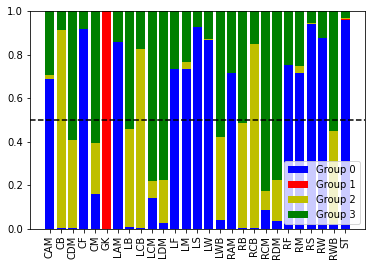

In [ ]:
p0 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '0'],
             compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '0'], color = 'b')
p1 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '1'],
             compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '1'], color = 'r',
             bottom = np.array(compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '0']))
p2 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '2'],
             compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '2'], color = 'y',
             bottom = np.array(compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '0']) + 
                      np.array(compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '1']))
p3 = plt.bar(compar_perc_barplot['Position'][compar_perc_barplot['Group'] == '3'],
             compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '3'], color = 'g',
             bottom = np.array(compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '0']) + 
                      np.array(compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '1']) +
                      np.array(compar_perc_barplot['Quantity'][compar_perc_barplot['Group'] == '2']))
plt.xticks(rotation = 90)
plt.axhline(0.5, color = 'black', linestyle='--')
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('Group 0', 'Group 1', 'Group 2', 'Group 3'))

In [ ]:
'''
Here we are counting how many positions above 50% of their values for each group we have
In the group 0 we have 13 positions above 50%. In the group 1 we have 1 position above 50% and so on
'''
counter1 = Counter(compar_perc[compar_perc['Quantity'] >= 0.5]['Group'])
counter1

Counter({0: 13, 1: 1, 2: 3, 3: 10})

In [ ]:

'''
Now we ordering the Counter1 by the groups (x[0] ==  number of the group)
'''
counter1 = dict(sorted(counter1.items(), key = lambda x: x[0]))
counter1

{0: 13, 1: 1, 2: 3, 3: 10}

In [ ]:
'''
The variable x has the keys from the dict counter1. The keys represents the groups
'''
x = [str(elem) for elem in list(counter1.keys())]
x

['0', '1', '2', '3']

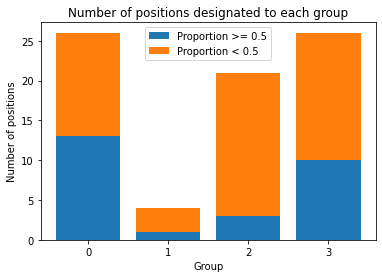

In [ ]:
p1 = plt.bar(x, counter1.values())
counter2 = Counter(compar_perc[compar_perc['Quantity'] < 0.5]['Group'])
counter2 = dict(sorted(counter2.items(), key = lambda x: x[0]))
x = [str(elem) for elem in list(counter2.keys())]

p2 = plt.bar(x, counter2.values(), bottom=list(counter1.values()))
plt.title('Number of positions designated to each group')
plt.xlabel('Group')
plt.ylabel('Number of positions')
plt.legend((p1[0], p2[0]), ('Proportion >= 0.5', 'Proportion < 0.5'))

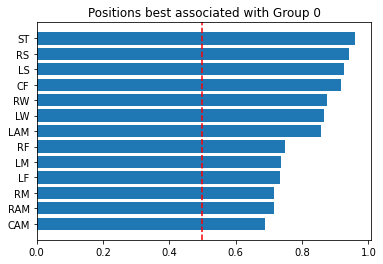

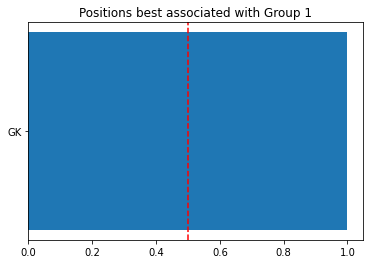

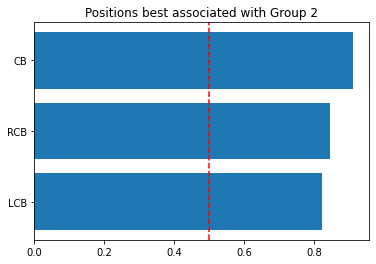

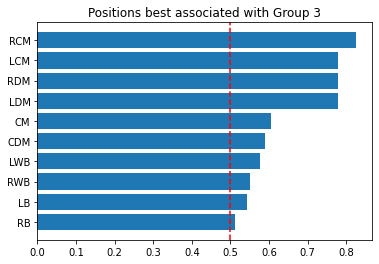

In [ ]:
for i in range(4):
  g = compar_perc[(compar_perc['Group'] == i) & (compar_perc['Quantity'] >= 0.5)][['Position', 'Quantity']]
  g = g.sort_values(by = 'Quantity')
  plt.barh(g['Position'], g['Quantity'])
  plt.axvline(0.5, color = 'r', linestyle = '--')
  plt.title('Positions best associated with Group ' + str(i))
  plt.show()

#**Feature selection with Random Forest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(df_train, groups)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
importances = rfc.feature_importances_
importances

array([0.00258187, 0.00294982, 0.01916742, 0.08373175, 0.01629134,
       0.01407381, 0.05110397, 0.04680592, 0.04235064, 0.02250865,
       0.01679283, 0.04638972, 0.00444359, 0.0072002 , 0.00972116,
       0.00518594, 0.00526392, 0.01878059, 0.002885  , 0.00904188,
       0.0034623 , 0.05224953, 0.01901444, 0.08387683, 0.06234664,
       0.0316046 , 0.02178287, 0.00619746, 0.06777926, 0.12041698,
       0.10399909])

In [ ]:
features = df.columns
features

Index(['Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [ ]:
df_imp = pd.DataFrame({'Features': features, 'Importance': importances})
df_imp.head()

,Features,Importance
0,Height,0.002582
1,Weight,0.002950
2,Crossing,0.019167
3,Finishing,0.083732
4,HeadingAccuracy,0.016291


In [ ]:
'''
Here we have the most important characteristics in order
'''
df_imp = df_imp.sort_values(by = 'Importance', ascending= False)
df_imp.head()

,Features,Importance
29,StandingTackle,0.120417
30,SlidingTackle,0.103999
23,Interceptions,0.083877
3,Finishing,0.083732
28,Marking,0.067779


In [ ]:
'''
Here we have the least important characteristics in order
'''
df_imp.tail()

,Features,Importance
12,Acceleration,0.004444
20,Strength,0.003462
1,Weight,0.002950
18,Jumping,0.002885
0,Height,0.002582


In [ ]:
df_imp['Sum_importance'] = df_imp['Importance'].cumsum()
df_imp = df_imp.sort_values(by = 'Importance')
df_imp.head()

,Features,Importance,Sum_importance
0,Height,0.002582,1.000000
18,Jumping,0.002885,0.997418
1,Weight,0.002950,0.994533
20,Strength,0.003462,0.991583
12,Acceleration,0.004444,0.988121


In [ ]:
'''
Those five last features, in his optimal values, represents over 45% of a 100% importance
'''
df_imp.tail()

,Features,Importance,Sum_importance
28,Marking,0.067779,0.459804
3,Finishing,0.083732,0.392025
23,Interceptions,0.083877,0.308293
30,SlidingTackle,0.103999,0.224416
29,StandingTackle,0.120417,0.120417


Text(0.5, 1.0, 'Feature importance in group assignment')

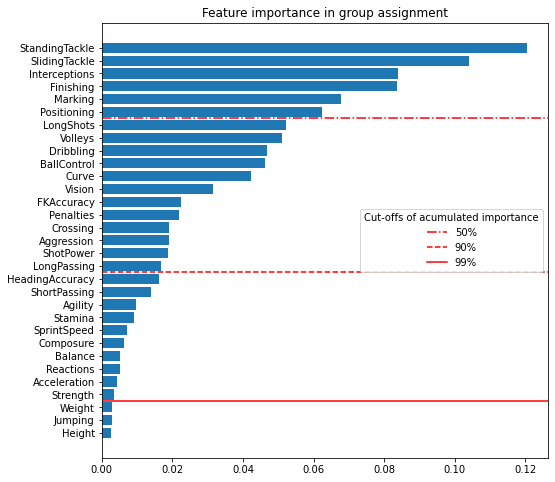

In [ ]:
plt.figure(figsize=(8,8))
plt.barh(df_imp['Features'], df_imp['Importance'])
l1 = plt.axhline(len(df_imp) - (len(df_imp['Features'][df_imp['Sum_importance'] < 0.50]) + 1.5), linestyle='-.', color = 'r')
l2 = plt.axhline(len(df_imp) - (len(df_imp['Features'][df_imp['Sum_importance'] < 0.90]) + 1.5), linestyle='--', color = 'r')
l3 = plt.axhline(len(df_imp) - (len(df_imp['Features'][df_imp['Sum_importance'] < 0.99]) + 1.5), linestyle='-', color = 'r')
plt.legend(title = 'Cut-offs of acumulated importance', handles=(l1, l2, l3), labels = ('50%', '90%', '99%'))
plt.title('Feature importance in group assignment')

#**Conclusions**
This exercise suggests that soccer players from the FIFA game can be separated into 4 technical profiles and also determines what are the most important technical resources for assigning a player to your group. Such analysis would be important, for instance, to verify that a player is assigned to his most efficient position on the field and also to suggest which technical resources should be improved (by physical training) to ensure that a player is a good representative of the profile desired technician.

#**Classification with Random Forest**

**Database division**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, groups, test_size = 0.2)

In [ ]:
X_train.shape

(14517, 31)

In [ ]:
X_test.shape

(3630, 31)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


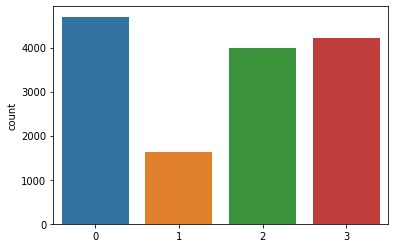

In [ ]:
'''
4 groups mean 4 classes
'''
import seaborn as sns
sns.countplot(y_train)

#**Trainning and testing the algorithm**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
'''
First register from the test database is in group 2, the second is in group 1 and so on
'''
predictions = rfc.predict(X_test)
predictions

array([0, 1, 0, ..., 3, 0, 0], dtype=int32)

In [ ]:
y_test

array([0, 1, 0, ..., 3, 0, 0], dtype=int32)

In [ ]:
accuracy_score(predictions, y_test)

0.9754820936639118

In [ ]:
cm = confusion_matrix(predictions, y_test)

In [ ]:
cm

array([[1135,    0,    8,   16],
       [   0,  402,    0,    0],
       [   5,    1,  959,   31],
       [  10,    0,   18, 1045]])

In [ ]:
!pip install yellowbrick --upgrade

     |████████████████████████████████| 266kB 2.7MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


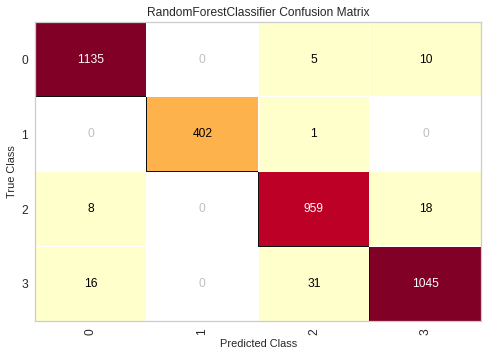

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(rfc)
confusion_matrix.fit(X_train, y_train)
confusion_matrix.score(X_test, y_test)
confusion_matrix.show();

#**Prediction of one single player**
If there is a new player, we wanna know to wich group he belongs to

In [ ]:
new = X_test[0]
new

array([0.65      , 0.45112782, 0.30681818, 0.65591398, 0.62222222,
       0.59302326, 0.59302326, 0.65591398, 0.36363636, 0.27472527,
       0.5       , 0.62637363, 0.48235294, 0.39285714, 0.53658537,
       0.61333333, 0.625     , 0.6344086 , 0.675     , 0.45238095,
       0.5125    , 0.62637363, 0.17857143, 0.15730337, 0.69892473,
       0.45238095, 0.64367816, 0.47311828, 0.2967033 , 0.0989011 ,
       0.18181818])

In [ ]:
new.shape

(31,)

In [ ]:
'''
The number 1 in the code below is the number of players. It it was 2 players, that would be the number 2.
'''
new = new.reshape(1, -1)
new.shape

(1, 31)

In [ ]:
'''
This is saying that this new player should be in group 2
'''
rfc.predict(new)

array([0], dtype=int32)

In [ ]:
'''
This is the probability that a new player will be in group 2. It has a 100% probability to be in group 2
'''
rfc.predict_proba(new)

array([[1., 0., 0., 0.]])